# <center> EE4708: Data Analytics Laboratory </center>


## <center> Assignment 1: Linear Regression </center>

### Importing the necessary packages

In [35]:
import numpy as np                                 # Numpy for mathematical manipulations
import pandas as pd                                # Pandas for data handling and manipulation
from sklearn.linear_model import LinearRegression  # Scikit learn for performing linear regression

import re                                          # Regular expressions for string searching

import matplotlib.pyplot as plt                    # Matplotlib for plotting

###  Reading in the data

Data is stored in a .xlsx file. For ease of processing, the file will be read in as a "Dataframe" using the Pandas library. This enables us to make use of the multitude of functions provided by the Pandas library.

It is assumed that the dataset is located in the same directory as this ipynb file.

In [7]:
# Openpyxl is a required package for pandas to open excel files.

!pip install openpyxl

     |████████████████████████████████| 242 kB 1.2 MB/s eta 0:00:01


In [92]:
#The first column of the given excel file can be used as the index column

df = pd.read_excel("merged_data.xlsx", index_col = 0)

### Data preprocessing and cleaning

Basic information regarding data:

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   Med_Income_Black   1924 non-null   float64
 9   Med_Income_Nat_Am  1474 non-null   float64
 10  Med_Income_Asian   1377 non-null   float64
 11  Hispanic           2453 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

The task at hand is to examine the effect of socioeconomic status on cancer incidence and mortality at a <b> national level </b>. Hence, the particular state/county from which a particular datapoint is obtained is not of relevance to us.

We can therefore safely discard columns "State", "AreaName", "FIPS", "fips_x" and "fips_y".

In [94]:
df = df.drop(columns = ["State", "AreaName", "FIPS", "fips_x", "fips_y"])

Next, we observe that the incidence rate, avg annual incidence, mortality rate and avg annuual deaths are all marked as having "object" dataype. This is an indication that not all values in these columns are numerical. This will present a problem during mathematical analyses. Hence, it is essential to examine these columns and try to make all values numerical or categorical.

Let's check the unique values which appear on the column "Incidence_Rate":

In [95]:
df['Incidence_Rate'].unique()

array(['*', 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 

It can be seen that there are 3 categories of non-numerical values:

- '*' : this indicates that the incidence rate is very low
- strings ending with # : these are probably just numerical values with the # introduced as a noise. These datapoints can be used after removing the #
- '_' and '__ ' : this probably indicates that the data is unavailable

We will first deal with the case where data is unavailable:

In [96]:
df[(df['Incidence_Rate'] == '__') | (df['Incidence_Rate'] == '_')]

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
882,2257,957,1300,38698.0,39505.0,38482.0,20833.0,NaN,39500.0,5602,779,5754,741,11356,1520,_,_,_,52.2,10
883,1362,668,694,40696.0,40370.0,NaN,81200.0,NaN,NaN,3391,487,3407,509,6798,996,_,_,_,50.6,6
884,2970,1310,1660,43581.0,44353.0,22375.0,NaN,NaN,NaN,6755,1145,7594,963,14349,2108,_,_,_,51.1,10
885,511,245,266,51811.0,51658.0,NaN,NaN,NaN,65938.0,2170,220,2078,261,4248,481,_,_,_,56,4
886,4261,1840,2421,44013.0,45325.0,22326.0,18958.0,NaN,22247.0,11051,2075,12159,1703,23210,3778,_,_,_,45.5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,832,350,482,45230.0,46528.0,NaN,NaN,NaN,41071.0,1995,525,1846,413,3841,938,__,__,__,61,4
1971,293,134,159,64832.0,66161.0,NaN,18438.0,NaN,NaN,1493,376,1826,210,3319,586,__,__,__,*,*
1972,65248,30454,34794,52870.0,54480.0,30773.0,42183.0,56760.0,41422.0,176960,39625,183055,32403,360015,72028,__,__,__,41.7,182
1973,987,381,606,57122.0,58096.0,NaN,52548.0,NaN,68333.0,3873,526,3532,731,7405,1257,__,__,__,46.1,6


In [97]:
df[(df['Incidence_Rate'] == '__') | (df['Incidence_Rate'] == '_')].shape

(209, 20)

Only 209/3134 entires lack incidence data. Since this is just 6%, we can just drop these columns.

In [98]:
df = df.drop(df[(df['Incidence_Rate'] == '__') | (df['Incidence_Rate'] == '_')].index)

In [99]:
df['Incidence_Rate'].unique()

array(['*', 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 

Next, we deal with values ending with #.

In [100]:
hash_indices = np.array(df[df.Incidence_Rate.str.contains("#$", na = False)].index)



In [101]:
df.loc[hash_indices, 'Incidence_Rate'] = df.loc[hash_indices, 'Incidence_Rate'].str[:-2]

In [102]:
df['Incidence_Rate'].unique()

array(['*', 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 

Finally, we deal with *.

In [103]:
star_indices = df[df['Incidence_Rate'] == '*' ].index

Since * represents very low incidence rate, we just replace it with 0.

In [104]:
df.loc[star_indices, 'Incidence_Rate'] = 0

In [105]:
df.loc[star_indices]

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,553,334,219,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,1442,1857,0,3 or fewer,*,*,*
1,499,273,226,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,4177,1333,0,3 or fewer,*,*,*
4,69,33,36,79750.0,88000.0,NaN,63333.0,NaN,25625.0,419,124,349,67,768,191,0,3 or fewer,*,*,*
5,254,139,115,81544.0,81029.0,NaN,47500.0,NaN,NaN,822,253,674,250,1496,503,0,3 or fewer,*,*,*
6,894,446,448,54173.0,81161.0,NaN,42212.0,NaN,86458.0,1678,900,1837,546,3515,1446,0,3 or fewer,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,282,88,194,43914.0,43816.0,NaN,NaN,NaN,NaN,788,215,1033,208,1821,423,0,3 or fewer,*,*,*
2913,1232,646,586,73528.0,69982.0,NaN,NaN,92019.0,61046.0,5839,2304,5675,1721,11514,4025,0,3 or fewer,*,42,4
2956,252,95,157,45855.0,46912.0,NaN,NaN,NaN,NaN,978,125,988,111,1966,236,0,3 or fewer,*,*,*
3124,328,154,174,40398.0,40739.0,NaN,NaN,NaN,NaN,1011,142,931,148,1942,290,0,3 or fewer,*,*,*


In [106]:
df['Incidence_Rate'].unique()

array([0, 61.5, 62.7, 58.1, 35.1, 64.9, 88.3, 74.7, 69.7, 103.6, 153.4,
       67.6, 44, 76.8, 66.1, 58.3, 74.9, 66.9, 74.6, 86.4, 65.8, 84.2,
       75.4, 82.4, 73.9, 49.2, 69.5, 83.3, 71.5, 75.9, 73.5, 82.6, 83,
       69.6, 76.7, 76.2, 60.8, 78.1, 75.5, 81.9, 77.3, 72.4, 90.3, 87.9,
       71, 66.5, 70.8, 80.9, 65.1, 80.4, 69.3, 88.1, 59.4, 73.4, 57.6,
       57.9, 64.8, 61.6, 74.2, 79.4, 62.3, 61, 83.1, 65.6, 61.8, 78.7,
       57.1, 55.5, 74, 70.5, 72.3, 98.3, 74.8, 73.2, 90.8, 85.9, 77, 85.6,
       56.4, 67.7, 86.3, 82.5, 59.1, 76.4, 71.6, 108.7, 83.6, 77.5, 72,
       75, 79.1, 75.6, 82.2, 79.2, 77.1, 64.7, 80.6, 96.1, 89.2, 60.6,
       94.2, 96.2, 82.3, 55.9, 104.4, 97.5, 97.2, 98.1, 102.7, 57, 63.4,
       79.5, 87, 91.9, 67.8, 82.7, 81.2, 73.6, 89.5, 67.5, 69.2, 63.9, 84,
       98.8, 87.8, 114, 67.1, 89, 68, 83.9, 65.2, 91.5, 72.1, 78.2, 70.4,
       89.3, 91.2, 108.5, 22.9, 46.9, 36.7, 54.3, 45.5, 64, 54.4, 52.2,
       76.6, 39.6, 50.9, 36.1, 51.9, 48, 46, 58.7, 61.4, 52

Finally, we typecast everything into float:

In [108]:
df['Incidence_Rate'] = df['Incidence_Rate'].astype('float')

Let's take a look at the current dataframe:

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2925 non-null   int64  
 1   M_Poverty          2925 non-null   int64  
 2   F_Poverty          2925 non-null   int64  
 3   Med_Income         2924 non-null   float64
 4   Med_Income_White   2923 non-null   float64
 5   Med_Income_Black   1852 non-null   float64
 6   Med_Income_Nat_Am  1362 non-null   float64
 7   Med_Income_Asian   1298 non-null   float64
 8   Hispanic           2283 non-null   float64
 9   M_With             2925 non-null   int64  
 10  M_Without          2925 non-null   int64  
 11  F_With             2925 non-null   int64  
 12  F_Without          2925 non-null   int64  
 13  All_With           2925 non-null   int64  
 14  All_Without        2925 non-null   int64  
 15  Incidence_Rate     2925 non-null   float64
 16  Avg_Ann_Incidence  2925 

Next, we look at Avg_Ann_Incidence:

In [110]:
df['Avg_Ann_Incidence'].unique()

array(['3 or fewer', 131, 6, 36, 9, 39, 12, 7, 51, 3, 4, 5, 43, 170, 25,
       23, 17, 120, 34, 32, 10, 16, 14, 57, 44, 11, 73, 66, 110, 19, 28,
       35, 88, 58, 482, 87, 37, 71, 69, 8, 15, 236, 33, 90, 347, 144, 116,
       18, 22, 24, 47, 72, 108, 74, 41, 135, 89, 31, 21, 129, 13, 26, 38,
       56, 78, 121, 45, 84, 29, 27, 62, 30, 59, 277, 20, 100, 46, 119, 81,
       52, 2059, 280, 628, 201, 203, 115, 687, 169, 554, 411, 86, 371, 54,
       70, 3701, 76, 145, 163, 92, 75, 1326, 222, 1031, 793, 807, 1485,
       459, 353, 161, 375, 189, 705, 99, 154, 246, 288, 273, 174, 344,
       182, 253, 94, 264, 282, 262, 124, 102, 101, 571, 662, 160, 718,
       224, 98, 351, 147, 387, 239, 185, 647, 1129, 233, 244, 268, 77,
       685, 281, 241, 155, 895, 180, 400, 651, 130, 67, 328, 493, 177,
       1310, 83, 153, 48, 588, 1183, 552, 1032, 631, 106, 166, 479, 53,
       568, 55, 91, 134, 50, 183, 341, 311, 431, 96, 42, 148, 49, 61, 79,
       107, 550, 80, 152, 309, 191, 68, 3359, 63, 529

We see a label named '3 or fewer'. We just consider this to be 0 for all practical purposes.

In [115]:
few_indices = df[df['Avg_Ann_Incidence'] == '3 or fewer'].index
df.loc[few_indices, 'Avg_Ann_Incidence'] = 0

In [118]:
df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].astype('float')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2925 non-null   int64  
 1   M_Poverty          2925 non-null   int64  
 2   F_Poverty          2925 non-null   int64  
 3   Med_Income         2924 non-null   float64
 4   Med_Income_White   2923 non-null   float64
 5   Med_Income_Black   1852 non-null   float64
 6   Med_Income_Nat_Am  1362 non-null   float64
 7   Med_Income_Asian   1298 non-null   float64
 8   Hispanic           2283 non-null   float64
 9   M_With             2925 non-null   int64  
 10  M_Without          2925 non-null   int64  
 11  F_With             2925 non-null   int64  
 12  F_Without          2925 non-null   int64  
 13  All_With           2925 non-null   int64  
 14  All_Without        2925 non-null   int64  
 15  Incidence_Rate     2925 non-null   float64
 16  Avg_Ann_Incidence  2925 

Next up is the column of recent_trend.

In [120]:
df['recent_trend'].unique()

array(['*', 'stable', 'falling', 'rising'], dtype=object)

Clearly, this is a categorical variable. We will define it as such using Pandas.

In [123]:
df['recent_trend'] = df['recent_trend'].astype(dtype = 'category')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2925 non-null   int64   
 1   M_Poverty          2925 non-null   int64   
 2   F_Poverty          2925 non-null   int64   
 3   Med_Income         2924 non-null   float64 
 4   Med_Income_White   2923 non-null   float64 
 5   Med_Income_Black   1852 non-null   float64 
 6   Med_Income_Nat_Am  1362 non-null   float64 
 7   Med_Income_Asian   1298 non-null   float64 
 8   Hispanic           2283 non-null   float64 
 9   M_With             2925 non-null   int64   
 10  M_Without          2925 non-null   int64   
 11  F_With             2925 non-null   int64   
 12  F_Without          2925 non-null   int64   
 13  All_With           2925 non-null   int64   
 14  All_Without        2925 non-null   int64   
 15  Incidence_Rate     2925 non-null   float64 
 16  Avg_An

Next, we analyze the mortality rate column.


In [125]:
df['Mortality_Rate'].unique()

array(['*', 47.3, 58.3, 54, 34.4, 50.1, 70.8, 76.2, 53.9, 96.1, 124.9,
       39.6, 60.8, 59.3, 48, 61.3, 67.8, 59.9, 29.7, 52.6, 63.1, 66, 43,
       43.9, 69.1, 59.7, 55.1, 61.2, 60.2, 68.9, 71.9, 61.4, 63.6, 65.3,
       56.3, 66.1, 67, 67.7, 65.8, 71.2, 34.5, 57.8, 56.1, 64, 51.5, 72.2,
       56.8, 70, 57.1, 55.9, 44, 41.1, 50.4, 51.9, 51.7, 66.6, 63.3, 52.9,
       49.9, 60.5, 60.3, 57.5, 47.2, 58.5, 65, 51, 61, 54.5, 54.4, 79.8,
       61.7, 69.9, 58.6, 64.3, 47, 62.6, 68.3, 70.2, 47.7, 53.3, 80.1,
       70.5, 49.2, 61.8, 75.7, 74, 62.8, 66.9, 70.1, 51.3, 62.5, 69.6,
       55.6, 75.3, 83.1, 48.4, 83.5, 67.3, 67.9, 76.8, 82.3, 61.9, 59,
       56.6, 70.4, 72.3, 72.5, 73.1, 70.9, 76.1, 64.9, 55.8, 78.5, 90.8,
       63.5, 103.5, 71.7, 54.7, 52, 65.9, 62.1, 60.4, 58.2, 71.6, 52.7,
       76, 17.7, 37, 25.6, 43.8, 33.8, 41.8, 37.7, 37.2, 59.1, 31, 37.3,
       33.6, 23.1, 38.1, 30.9, 33.4, 46, 40.2, 48.9, 36.1, 34.3, 36.2,
       42.7, 27, 36.5, 41.4, 56, 31.1, 43.3, 42.1, 34.8, 3

As before, we set the values conatining * to zero.

In [126]:
mortality_star_indices = df[df['Mortality_Rate'] == '*' ].index
df.loc[mortality_star_indices, 'Mortality_Rate'] = 0

In [127]:
df['Mortality_Rate'] = df['Mortality_Rate'].astype('float')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2925 non-null   int64   
 1   M_Poverty          2925 non-null   int64   
 2   F_Poverty          2925 non-null   int64   
 3   Med_Income         2924 non-null   float64 
 4   Med_Income_White   2923 non-null   float64 
 5   Med_Income_Black   1852 non-null   float64 
 6   Med_Income_Nat_Am  1362 non-null   float64 
 7   Med_Income_Asian   1298 non-null   float64 
 8   Hispanic           2283 non-null   float64 
 9   M_With             2925 non-null   int64   
 10  M_Without          2925 non-null   int64   
 11  F_With             2925 non-null   int64   
 12  F_Without          2925 non-null   int64   
 13  All_With           2925 non-null   int64   
 14  All_Without        2925 non-null   int64   
 15  Incidence_Rate     2925 non-null   float64 
 16  Avg_An

Finally, we deal with the column containing averge annual deaths.

In [129]:
df['Avg_Ann_Deaths'].unique()

array(['*', 96, 5, 31, 8, 28, 9, 6, 37, 3, 4, 34, 121, 20, 17, 43, 15, 86,
       29, 21, 13, 12, 33, 46, 11, 39, 63, 55, 32, 90, 14, 25, 27, 69,
       381, 71, 66, 51, 10, 179, 23, 75, 289, 16, 117, 88, 18, 38, 61,
       100, 24, 54, 106, 7, 19, 48, 36, 95, 58, 22, 49, 223, 85, 91, 65,
       26, 42, 1463, 216, 35, 464, 146, 151, 74, 495, 126, 404, 79, 291,
       270, 53, 2876, 70, 50, 979, 154, 808, 595, 625, 1097, 324, 277,
       120, 254, 134, 472, 119, 186, 200, 40, 145, 250, 60, 133, 177, 196,
       92, 77, 76, 365, 439, 99, 467, 142, 62, 240, 105, 171, 114, 139,
       487, 827, 175, 194, 465, 211, 183, 110, 616, 143, 279, 441, 98,
       236, 347, 124, 885, 57, 424, 102, 852, 422, 777, 423, 78, 107, 213,
       104, 366, 187, 41, 84, 30, 59, 298, 81, 72, 113, 47, 64, 377, 56,
       233, 68, 136, 73, 2369, 362, 193, 257, 129, 101, 165, 45, 281, 198,
       163, 80, 111, 545, 52, 157, 122, 44, 512, 67, 159, 199, 262, 185,
       135, 326, 390, 271, 713, 354, 292, 471, 131, 

Again, we set * = 0.

In [130]:
death_star_indices = df[df['Avg_Ann_Deaths'] == '*' ].index
df.loc[mortality_star_indices, 'Avg_Ann_Deaths'] = 0

In [131]:
df['Avg_Ann_Deaths'] = df['Avg_Ann_Deaths'].astype('float')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   All_Poverty        2925 non-null   int64   
 1   M_Poverty          2925 non-null   int64   
 2   F_Poverty          2925 non-null   int64   
 3   Med_Income         2924 non-null   float64 
 4   Med_Income_White   2923 non-null   float64 
 5   Med_Income_Black   1852 non-null   float64 
 6   Med_Income_Nat_Am  1362 non-null   float64 
 7   Med_Income_Asian   1298 non-null   float64 
 8   Hispanic           2283 non-null   float64 
 9   M_With             2925 non-null   int64   
 10  M_Without          2925 non-null   int64   
 11  F_With             2925 non-null   int64   
 12  F_Without          2925 non-null   int64   
 13  All_With           2925 non-null   int64   
 14  All_Without        2925 non-null   int64   
 15  Incidence_Rate     2925 non-null   float64 
 16  Avg_An

With that, all variables are either numerical or categorical which makes it easy for us to apply various mathematical tools. 

### Exploratory Data Analysis

The overarching goal of the assignment is to see if there is any correlation between socioeconomic status and cancer incidence/ death.

Towards this, let us first try to make some qualitative observations through various plots. This will give insights which can be later used to make quantitaive anlyses.

To make meaningful plots, it makes sense to normalize the data first.

In [151]:
numerical_df = df.loc[:, df.columns != 'recent_trend']
normalized_numerical_df = (numerical_df - numerical_df.mean())/numerical_df.std()

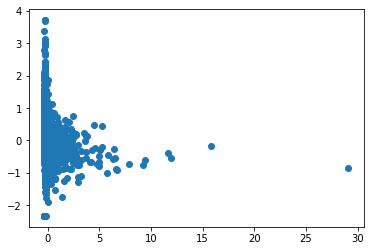

In [157]:
plt.scatter(normalized_numerical_df['All_With'], normalized_numerical_df['Mortality_Rate'])